# MACHINE LEARNING LAB-7:PCA&LDA
<hr/>

**Submitted by: <br>**
Name: **Stebin George** <br>
Register Number: **21122061** <br>
Class: **2MSCDS** <br> 
Time Taken: **5 hours**
<hr/>


## Lab Overview  
### Objectives

**TO get to know more about the PCA and LDA two major dimensionality reduction techniques in ML**

### LIBRARIES:


In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA

### Questions:
- Part A. Perform PCA and LDA on Breast Cancer Dataset, write down your obsevations. While loading, use the toy dataset available in SKLearn (load_breast_cancer)
- Part B. Illustrate the effect of changing various method parameters of PCA and LDA. Compare the accuracies, and provide visualizations and interpretations for the evaluation metrices.
- Part C. "PCA could be used in applications such as Image Processing, to reduce the complexity of data and improve performance or to compress images". Justify this statement with your own findings.


### Problem Definition:

**The problem tries to give a introducrion about Pca and Lda in dimensionality reduction.**

### Approach

* Importing the necessary libraries
* analysing the data and doing the basic operations
* doing the EDA and pre-processing steps
* Loading the PCA & LDA function
* Plotting the accuracy
* checking for the accuracy
* usage of images to show compression using PCA

<hr/>


### Sections

1. Libraries
1. introduction
1. EDA
1. PCA&LDA
1. Q&A
1. Accuracy Table
1. Conclusion

<hr/>

### Loading Dataset:

In [265]:
df=datasets.load_breast_cancer(as_frame=True)
df1=df.data
df1['diagnosis']=df.target

In [3]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
#checking the shape
df1.shape

(569, 31)

**Datset has 569 rows and 33 columns**

In [5]:
df1.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


**GIVES THE SUMMARY OF THE DATASET**

### CHECKING NULL VALUES:

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df1.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

**We dont have any null values here**

### EDA:

In [8]:
import warnings
warnings.filterwarnings('ignore')

Number of Benign:  357
Number of Malignant :  212


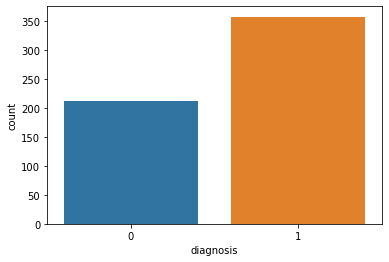

In [9]:
ax = sns.countplot(df1.diagnosis,label="Count")   
B, M =df1.diagnosis.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

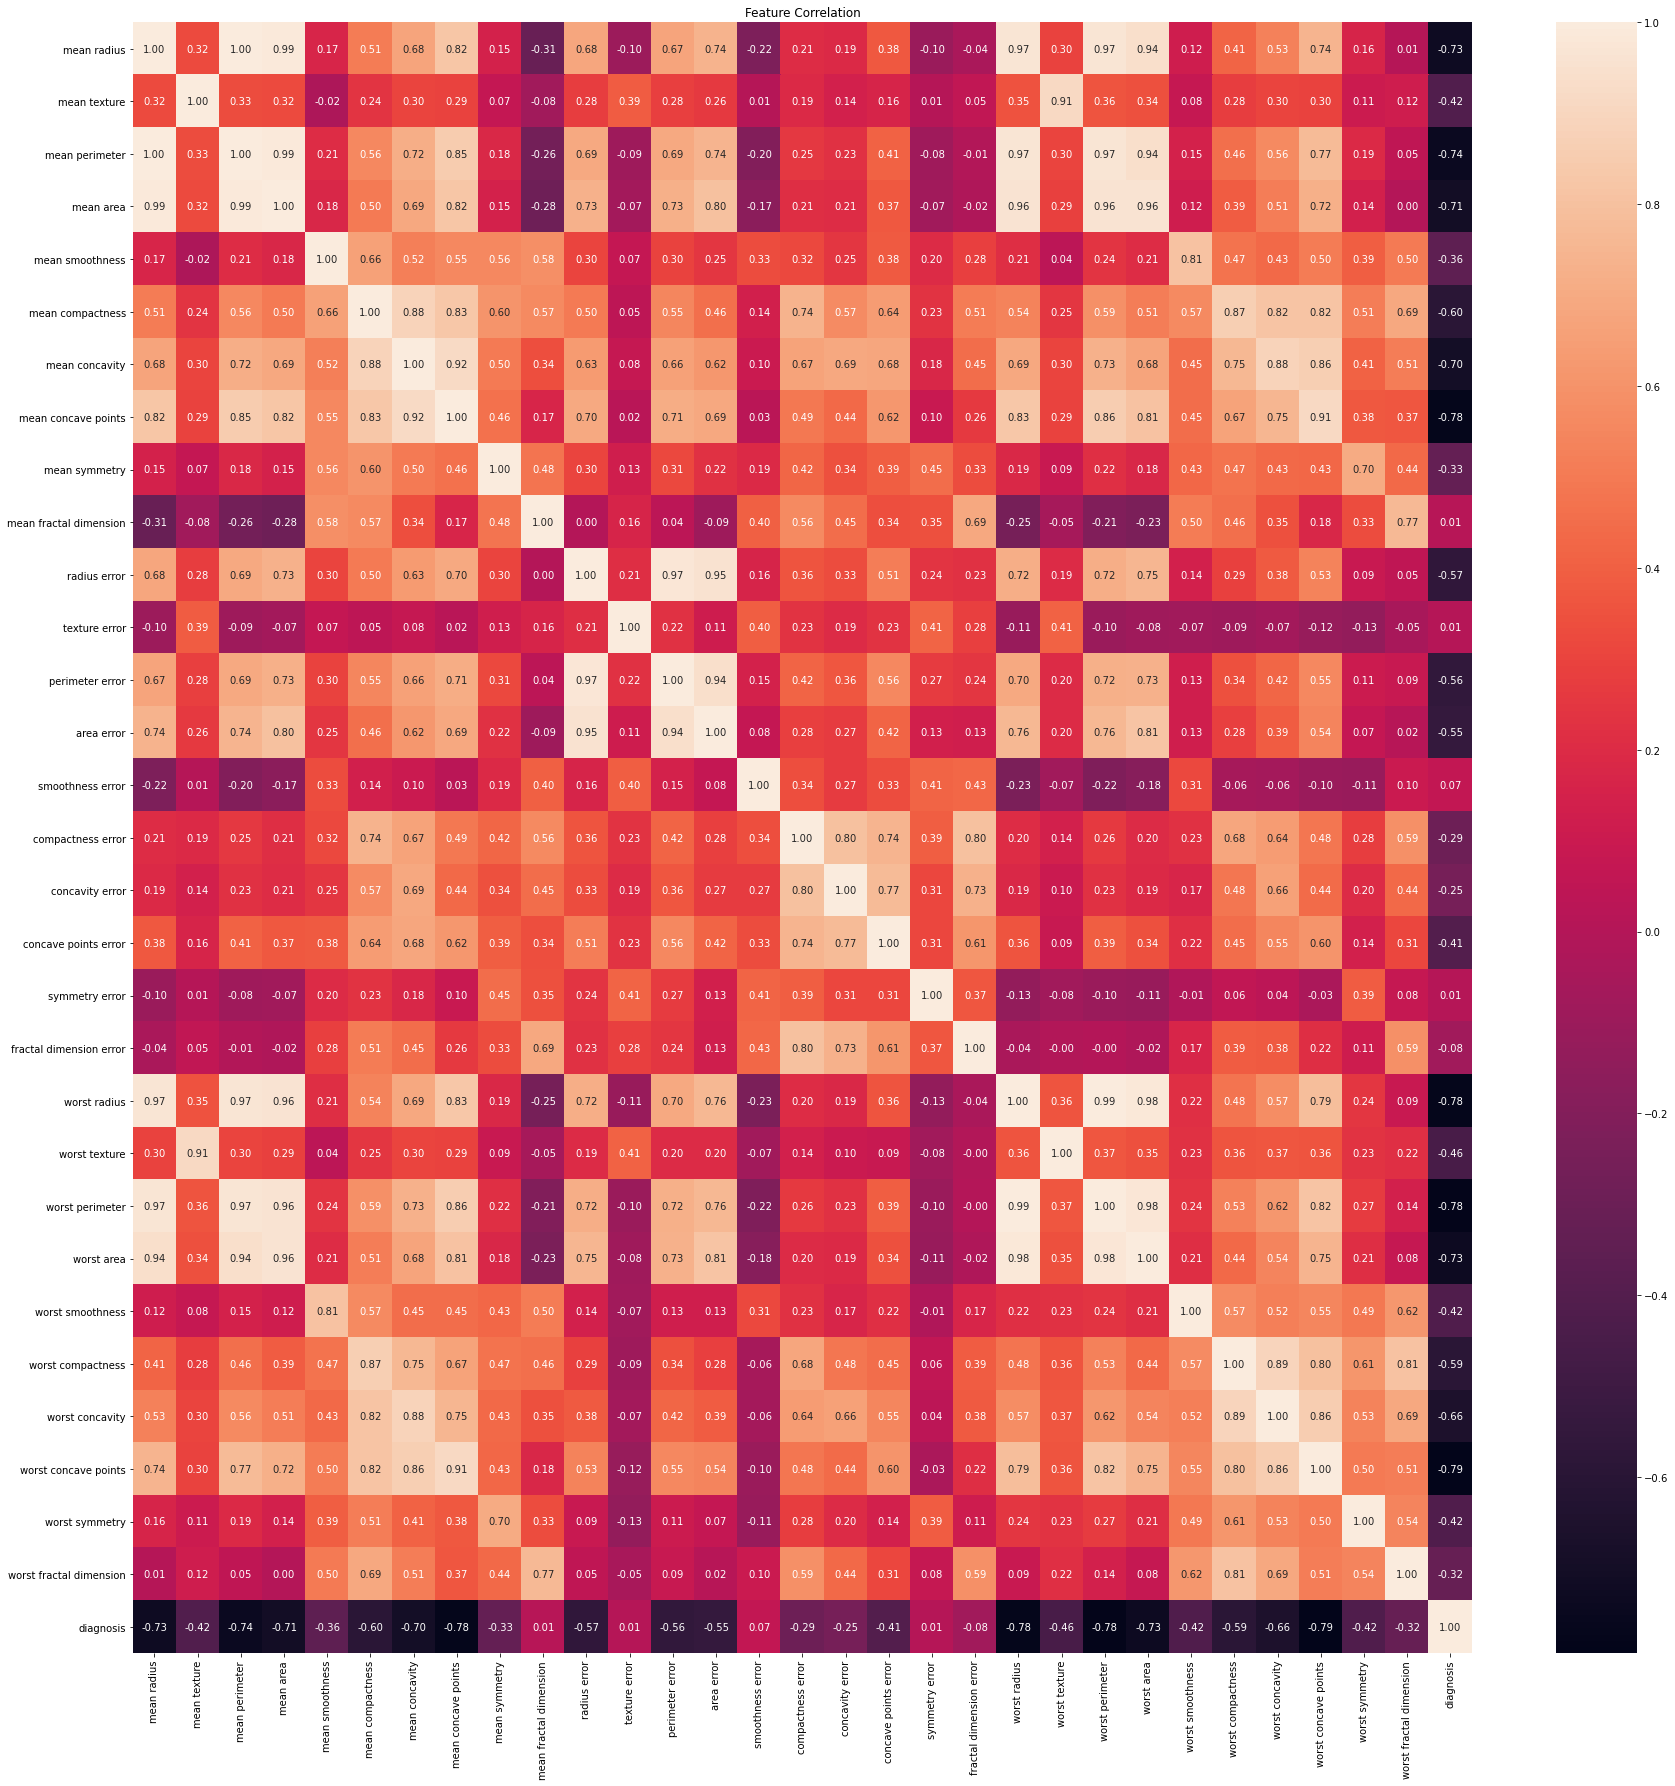

In [10]:
# Correlation Matrix
plt.figure(figsize=(30,30))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot = True, fmt = '.2f',)
plt.title("Feature Correlation")
plt.show() 

**The above graph shows the correlation plot of the different variables in the dataset.**

In [11]:
df1.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


### Feature contributions to the target variable:

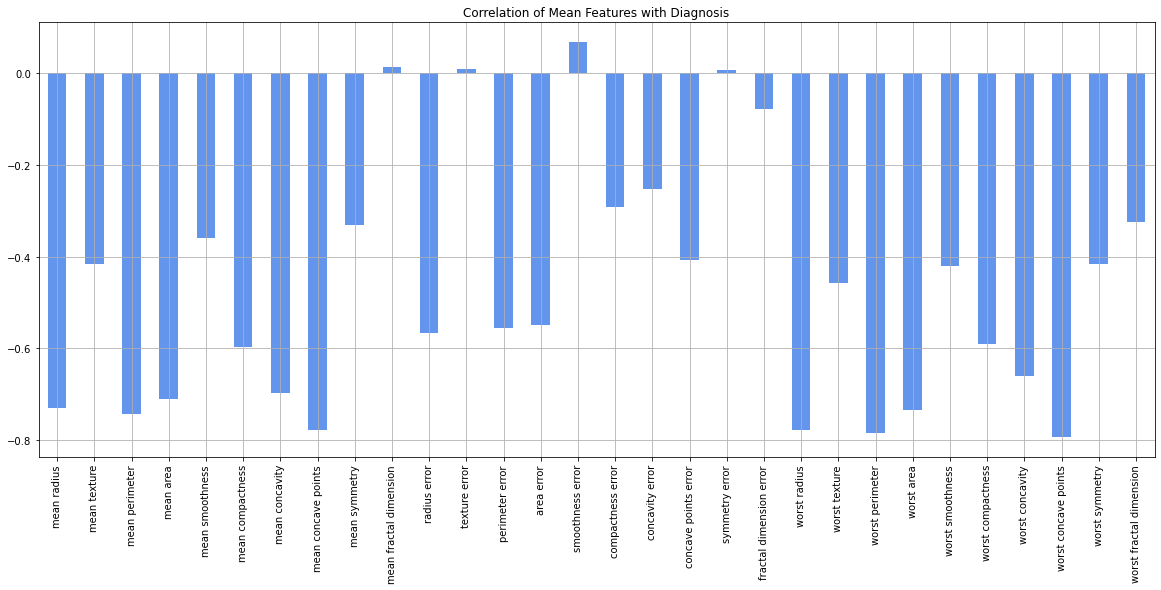

In [19]:
df_mean = df1[df1.columns[:]]
plt.figure(figsize=(20, 8))
df_mean.drop('diagnosis', axis=1).corrwith(df_mean.diagnosis).plot(kind='bar', grid=True, title="Correlation of Mean Features with Diagnosis", color="cornflowerblue");

**Splitting the data**

In [28]:
X = df1.iloc[:,1:-1]
y = df1.iloc[:,-1]

**Standardizing the dataset:**

In [110]:
sc = StandardScaler()
X_stand = sc.fit_transform(X)

### Question1)
*Part A. Perform PCA and LDA on Breast Cancer Dataset, write down your obsevations. While loading, use the toy dataset available in SKLearn (load_breast_cancer)*

## NORMAL DATA:

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=42)

In [98]:
classifer = LogisticRegression()
classifer.fit(X_train, y_train)
predictions  = classifer.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [99]:
print(accuracy_score(y_test,predictions))

0.9407894736842105


## PCA: 

In [275]:
pca = PCA(n_components=3)
pca.fit(X_stand)
PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
X_pca = pca.transform(X_stand)
X_pca.shape

(569, 3)

In [276]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.43706363, 0.18472237, 0.09716239])

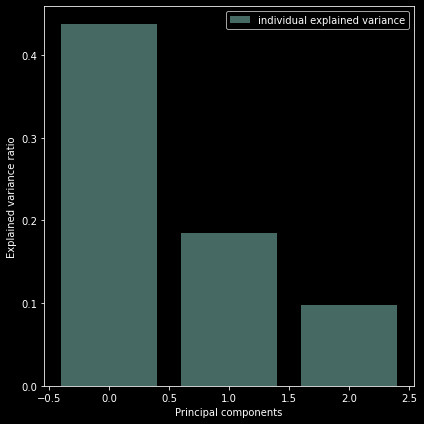

In [277]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6,6))

    plt.bar(range(3), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.8,random_state=42)

In [115]:
classifer = LogisticRegression()
classifer.fit(X_train, y_train)

LogisticRegression()

In [116]:
predictions  = classifer.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [117]:
print(accuracy_score(y_test,predictions))

0.956140350877193


### OBSERVATION:

**With PCA the logistics regression was giving better accuracy**
**PCA has no concern with the class labels. It summarizes the feature set without considering the output. PCA tries to find the directions of the maximum variance in the dataset. In a high cardinality feature set, there are possibilities of duplicate features which would add redundancy to the dataset, increase the computation cost and add unneccessary model complexity. The role of PCA is to find such highly correlated or duplicate features and to come up with a new feature set where there is minimum correlation between the features or in other words feature set with maximum variance between the features.**

### LDA:

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_stand, y, test_size=0.8,random_state=42)

In [119]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [120]:
classifer = LogisticRegression()
classifer.fit(X_train, y_train)

LogisticRegression()

In [121]:
predictions  = classifer.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [122]:
print(accuracy_score(y_test,predictions))

0.9320175438596491


### OBSERVATIONS:
**LDA tries to reduce the dimensionality by taking into consideration the information that discriminates the output classes. LDA tries to find the decision boundary around each cluster of class.It projects the data points to new dimension in a way that the clusters are as seperate from each other as possible and individual elements within a class are as close to the centroid as possible.In other words, the inter-class seperability is increased in LDA. Intra-class seperability is reduced.
The new dimensions are the linear discriminants of the feature set.**

****


### QUESTION-2:

**Part B. Illustrate the effect of changing various method parameters of PCA and LDA. Compare the accuracies, and provide visualizations and interpretations for the evaluation metrices.**

In [258]:
def standard_scalar(data):
    sc = StandardScaler()
    X_stand = sc.fit_transform(data)
    return(X_stand)
def pca(X_stand,n_components):
    pca = PCA(n_components)
    pca.fit(X_stand)
    X_pca = pca.transform(X_stand)
    return (X_pca)
def logistic(X_train, X_test, y_train, y_test):
    classifer = LogisticRegression()
    classifer.fit(X_train, y_train)
    predictions  = classifer.predict(X_test)
    acc=accuracy_score(y_test,predictions)
    return(acc)

In [261]:
method=['NORMAL','PCA','LDA']
randomstate=[5,10,15,20,25]
n_components=[1,3,5,7,9]
methods=[]
accu=[]
random=[]
n_component=[]
for i in method:
    if i =='NORMAL':
        for j in randomstate:
            methods.append(i)
            random.append(j)
            n_component.append('NA')
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=j)
            acc=logistic(X_train, X_test, y_train, y_test)
            accu.append(acc)     
    elif i=='PCA':
        X_stand=standard_scalar(X)
        for j in randomstate:
            for k in n_components:
                methods.append(i)
                random.append(j)
                n_component.append(k)
                X_pca=pca(X_stand,k)
                X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.8,random_state=j)
                acc1=logistic(X_train, X_test, y_train, y_test)
                accu.append(acc1)
    elif i=='LDA':
        for j in randomstate:
            methods.append(i)
            random.append(j)
            n_component.append(1)
            X_train, X_test, y_train, y_test = train_test_split(X_stand, y, test_size=0.8,random_state=j)
            lda = LDA(n_components = 1)
            X_train = lda.fit_transform(X_train, y_train)
            X_test = lda.transform(X_test)
            acc1=logistic(X_train, X_test, y_train, y_test)
            accu.append(acc1)

### ACCURACY DATAFRAME:

In [262]:
score=pd.DataFrame()
score['method']=methods
score['randomstate']=random
score['no of components']=n_component
score['accuracy']=accu
score

,method,randomstate,no of components,accuracy
0,NORMAL,5,NA,0.940789
1,NORMAL,10,NA,0.940789
2,NORMAL,15,NA,0.947368
3,NORMAL,20,NA,0.921053
4,NORMAL,25,NA,0.918860
5,PCA,5,1,0.910088
6,PCA,5,3,0.936404
7,PCA,5,5,0.953947
8,PCA,5,7,0.953947
9,PCA,5,9,0.960526


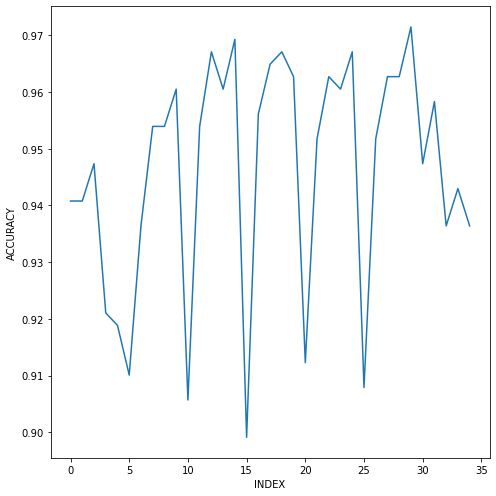

In [282]:
plt.figure(figsize=(7,7))
plt.plot(accu)
plt.ylabel('ACCURACY')
plt.xlabel('INDEX')
plt.tight_layout()

**For the random state of 25 and a pca component of 9 we ge t the maximum accuracy of 97.14%**

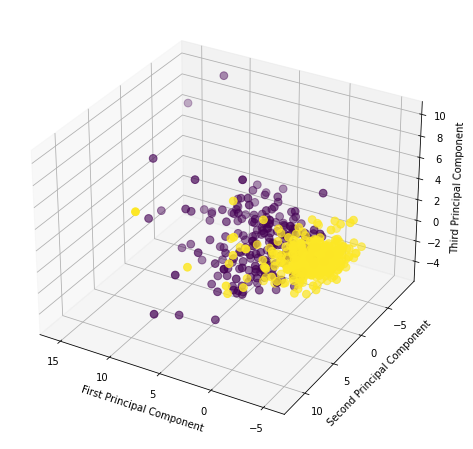

In [263]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=df1['diagnosis'], s=60)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(30, 120)

Text(0, 0.5, 'Second Principal Component')

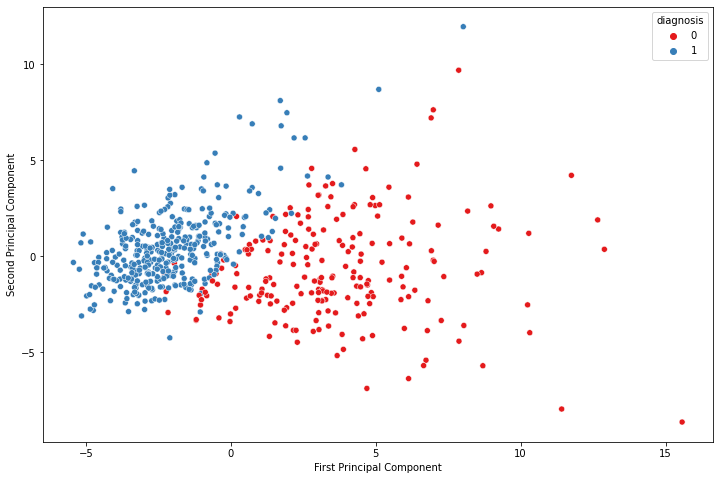

In [264]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,0], x_pca[:,1],hue=df1['diagnosis'], palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

****

### QUESTION 3:
**"PCA could be used in applications such as Image Processing, to reduce the complexity of data and improve performance or to compress images". Justify this statement with your own findings.**

**The MNIST dataset contains the image data of handwritten digits.** 

In [239]:
mnist = pd.read_csv(r"C:\Users\stebi\OneDrive\Desktop\mnist.csv")
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**The ‘label’ column contains the values of the digit (0–9). We do not need that column for our analysis because PCA is an unsupervised machine learning task that does not deal with labelled data. So, we can simply drop that column.**

In [241]:
mnist.drop(columns='label', inplace=True)
mnist.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
mnist.shape

(60000, 785)

### Plotting the image:

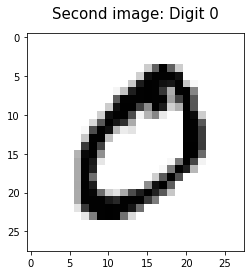

In [246]:
second_image = mnist.iloc[1].values.reshape([28,28])
plt.imshow(second_image, cmap='gray_r')
plt.title('Second image: Digit 0', fontsize=15, pad=15)
plt.savefig("Second image.png")

**Apply PCA with the original number of dimensions (i.e., 784) and create the scree plot to see how well PCA captures the variance of the data.**

Text(0, 0.5, 'Explained variance')

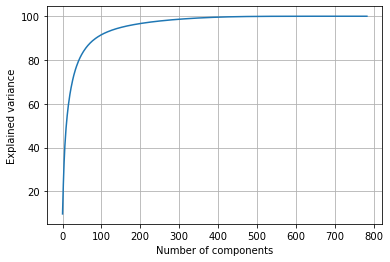

In [255]:
pca_784 = PCA(n_components=784)
pca_784.fit(mnist)
plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Reducing the number of principal components to 10 and obtaining the output**

Text(0.5, 1.0, 'Compressed image with 10 components')

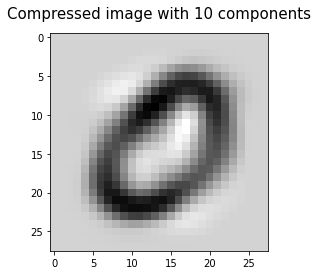

In [248]:
pca_10 = PCA(n_components=10)
mnist_pca_10_reduced = pca_10.fit_transform(mnist)
mnist_pca_10_recovered = pca_10.inverse_transform(mnist_pca_10_reduced)

image_pca_10 = mnist_pca_10_recovered[1,:].reshape([28,28])
plt.imshow(image_pca_10, cmap='gray_r')
plt.title('Compressed image with 10 components', fontsize=15, pad=15)

**Increasing the number of components of pca to 184 shows much more clearer image than pca with 10 components.**

Text(0.5, 1.0, 'Compressed image with 184 components')

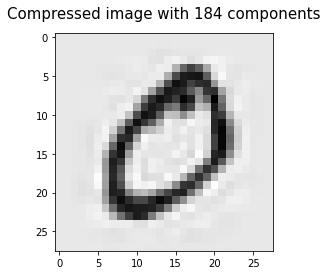

In [253]:
pca_184 = PCA(n_components=184)
mnist_pca_184_reduced = pca_184.fit_transform(mnist)
mnist_pca_184_recovered = pca_184.inverse_transform(mnist_pca_184_reduced)

image_pca_184 = mnist_pca_184_recovered[1,:].reshape([28,28])
plt.imshow(image_pca_184, cmap='gray_r')
plt.title('Compressed image with 184 components', fontsize=15, pad=15)

In [254]:
np.cumsum(pca_184.explained_variance_ratio_ * 100)[-1]

96.11902137200546

### 96.12% of the variance in the model is explained by the pca with 184 instead of 784.THus we actually reduced the size of the image without acyally loosing the accuracy of the model.

#### OBSERVATION:
**The image at the left is the original image with 784 dimensions. The image at the right is the compressed image with 184 dimensions. After applying PCA on image data, the dimensionality has been reduced by 600 dimensions while keeping about 96% of the variability in the original image data! By comparing these two images, you can see that there is a slight image quality loss, but the content of the compressed image is still visible.**

--------------

### References:

PCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
https://towardsdatascience.com/principal-component-analysis-for-breast-cancer-data-with-r-and-python-b312d28e911f
https://www.kaggle.com/jahirmorenoa/pca-to-the-breast-cancer-data-set
https://www.youtube.com/watch?v=e2sM7ccaA9c&ab_channel=DigitalSreeni
https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118
https://www.kaggle.com/mirzarahim/introduction-to-pca-image-compression-example
https://github.com/gtraskas/breast_cancer_prediction/blob/master/breast_cancer.ipynb

LDA

http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
https://machinelearningmastery.com/linear-discriminant-analysis-with-python/
https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2
https://www.mygreatlearning.com/blog/linear-discriminant-analysis-or-lda/
https://www.geeksforgeeks.org/ml-linear-discriminant-analysis/